In [1]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()

2024-02-20 03:53:07.604177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 03:53:07.604332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 03:53:07.614020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 03:53:07.671179: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-20 03:53:08.857156: W tensorflow/compiler/tf2

In [2]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

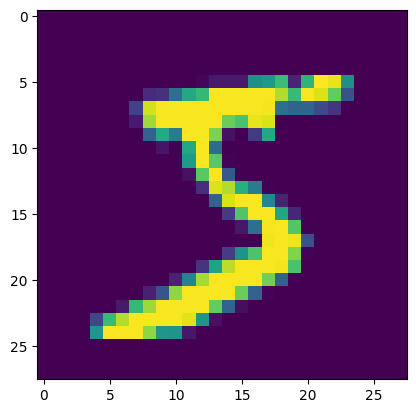

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [4]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(labels_train, 10) 
y_test = to_categorical(labels_test, 10)

In [6]:
datagen = ImageDataGenerator(rotation_range=15, # Rotating randomly the images up to 25°
                             width_shift_range=0.05, # Moving the images from left to right
                             height_shift_range=0.05, # Then from top to bottom
                             shear_range=0.10, 
                             zoom_range=0.02, # Zooming randomly up to 20%
                             zca_whitening=False,
                             horizontal_flip=False, 
                             vertical_flip=False,
                             fill_mode = 'nearest')
datagen.fit(X_train)
# fit parameters from data
# datagen.mean = X_train.mean(axis=0)
# datagen.std = X_train.std(axis=0)

In [49]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from keras.layers import RandomFlip, RandomRotation
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Conv2D(32, kernel_size = 5, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(98, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(98, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy')

In [53]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [54]:
history = model.fit(datagen.flow(X_train, y_train), validation_data = (X_test, y_test), epochs = 30, batch_size=128)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.8421 - loss: 0.5096 - val_accuracy: 0.9845 - val_loss: 0.0475
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9682 - loss: 0.1070 - val_accuracy: 0.9879 - val_loss: 0.0379
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9740 - loss: 0.0826 - val_accuracy: 0.9913 - val_loss: 0.0277
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9779 - loss: 0.0714 - val_accuracy: 0.9943 - val_loss: 0.0188
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9814 - loss: 0.0612 - val_accuracy: 0.9935 - val_loss: 0.0188
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9840 - loss: 0.0547 - val_accuracy: 0.9949 - val_loss: 0.0151
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9852 - loss: 0.0500 - val_accuracy: 0.9957 - val_loss: 0.0139
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9863 - loss: 

In [80]:
nets = 5
model = [0] *nets
for j in range(nets):
    model[j] = Sequential()

    model[j].add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 3, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Dropout(0.4))

    model[j].add(Conv2D(128, kernel_size = 4, activation='relu'))
    model[j].add(BatchNormalization())
    model[j].add(Flatten())
    model[j].add(Dropout(0.4))
    model[j].add(Dense(10, activation='softmax'))

    # COMPILE WITH ADAM OPTIMIZER AND CROSS ENTROPY COST
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [81]:
from keras.callbacks import LearningRateScheduler
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
# TRAIN NETWORKS
history = [0] * nets
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(datagen.flow(X_train,y_train, batch_size=64),
        epochs = epochs, validation_data = (X_test,y_test), callbacks=[annealer], verbose=2)
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

Epoch 1/30
938/938 - 27s - 29ms/step - accuracy: 0.9218 - loss: 0.2542 - val_accuracy: 0.9830 - val_loss: 0.0528 - learning_rate: 0.0010
Epoch 2/30
938/938 - 14s - 15ms/step - accuracy: 0.9730 - loss: 0.0916 - val_accuracy: 0.9933 - val_loss: 0.0204 - learning_rate: 9.5000e-04
Epoch 3/30
938/938 - 13s - 14ms/step - accuracy: 0.9795 - loss: 0.0671 - val_accuracy: 0.9873 - val_loss: 0.0389 - learning_rate: 9.0250e-04
Epoch 4/30
938/938 - 14s - 15ms/step - accuracy: 0.9817 - loss: 0.0623 - val_accuracy: 0.9925 - val_loss: 0.0225 - learning_rate: 8.5737e-04
Epoch 5/30
938/938 - 14s - 15ms/step - accuracy: 0.9840 - loss: 0.0532 - val_accuracy: 0.9916 - val_loss: 0.0259 - learning_rate: 8.1451e-04
Epoch 6/30
938/938 - 14s - 15ms/step - accuracy: 0.9841 - loss: 0.0509 - val_accuracy: 0.9946 - val_loss: 0.0160 - learning_rate: 7.7378e-04
Epoch 7/30
938/938 - 13s - 14ms/step - accuracy: 0.9870 - loss: 0.0428 - val_accuracy: 0.9955 - val_loss: 0.0155 - learning_rate: 7.3509e-04
Epoch 8/30
938/93

In [105]:
from keras.models import Model 
from keras.layers import Input
from keras import layers

def ensembleModels(models, model_input):
    # collect outputs of models in a list
    yModels=[model(model_input) for model in models] 
    # averaging outputs
    yAvg=layers.average(yModels) 
    # build model from same input and avg output
    modelEns = Model(inputs=model_input, outputs=yAvg,    name='ensemble_model')  
   
    return modelEns

for mod in model:
    
model_input = Input(shape=model[0].input_shape[1:]) # c*h*w
modelEns = ensembleModels(model, model_input)

In [109]:
import numpy as np
outputs=modelEns.predict(X_test)
labels_predicted=np.argmax(outputs, axis=1) 
misclassified=sum(labels_predicted!=labels_test) 
print('Percentage misclassified = ',100*misclassified/labels_test.size)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Percentage misclassified =  0.28


In [89]:
modelEns.summary()

Model: "ensemble"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_52      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_44       │ (None, 10)        │    327,242 │ input_layer_52[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_45       │ (None, 10)        │    327,242 │ input_layer_52[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_46       │ (None, 10)        │    327,242 │ input_layer_52[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_47       │ (None, 10)        │    327,242 │ input_layer_52[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_48       │ (None, 10)        │    327,242 │ input_layer_52[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_1 (Average) │ (None, 10)        │          0 │ sequential_44[0]… │
│                     │                   │            │ sequential_45[0]… │
│                     │                   │            │ sequential_46[0]… │
│                     │                   │            │ sequential_47[0]… │
│                     │                   │            │ sequential_48[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,636,210 (6.24 MB)

 Trainable params: 1,632,050 (6.23 MB)

 Non-trainable params: 4,160 (16.25 KB)

In [99]:
for i in range(len(modelEns.weights)):
    modelEns.weights[i]._handle_name = modelEns.weights[i].name + "_" + str(i)

In [100]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [108]:
modelEns.save('temp.h5')

ValueError: Unable to synchronously create dataset (name already exists)